In [22]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import math
from sklearn.preprocessing import MinMaxScaler

# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns=None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

In [2]:
df=pd.read_csv('../datos/salarios_bajos.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste

Manualmente

In [3]:
media=df["salary_in_usd"].mean()
maximo=df["salary_in_usd"].max()
minimo=df["salary_in_usd"].min()

Creamos una nueva columna con la función de normaliozación manual llamada salary_norm.

In [5]:
df["salary_norm"]=(df["salary_in_usd"]-media)/(maximo-minimo)
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_norm
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.10
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,0.56


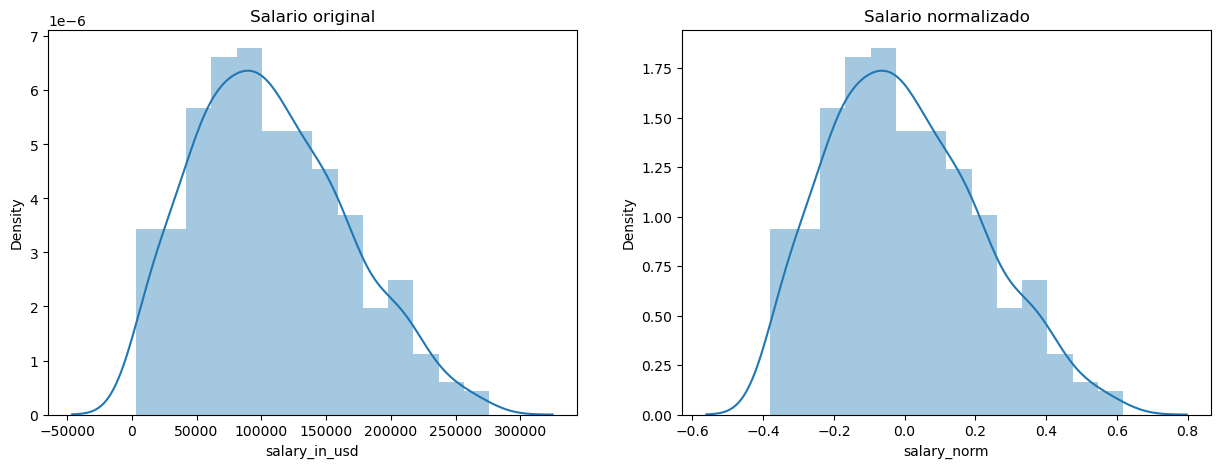

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salario original')
axes[1].set_title('Salario normalizado')

sns.distplot(df['salary_in_usd'] ,ax = axes[0])
sns.distplot(df["salary_norm"], ax = axes[1]);
plt.show()

Hacemos el test de Shapiro.

In [8]:
stats.shapiro(df["salary_norm"])

ShapiroResult(statistic=0.9784160852432251, pvalue=1.0452704657382128e-07)

Como podemos observar tanto en gráfico como en el shapiro test no logramos normalizar nuestros datos, probaremos otros métodos.

### Transformación logaritmica

In [10]:
df["salary_log"]=df["salary_in_usd"].apply(lambda x:np.log(x) if x>0 else 0)
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_norm,salary_log
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.10,11.29
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,0.56,12.47


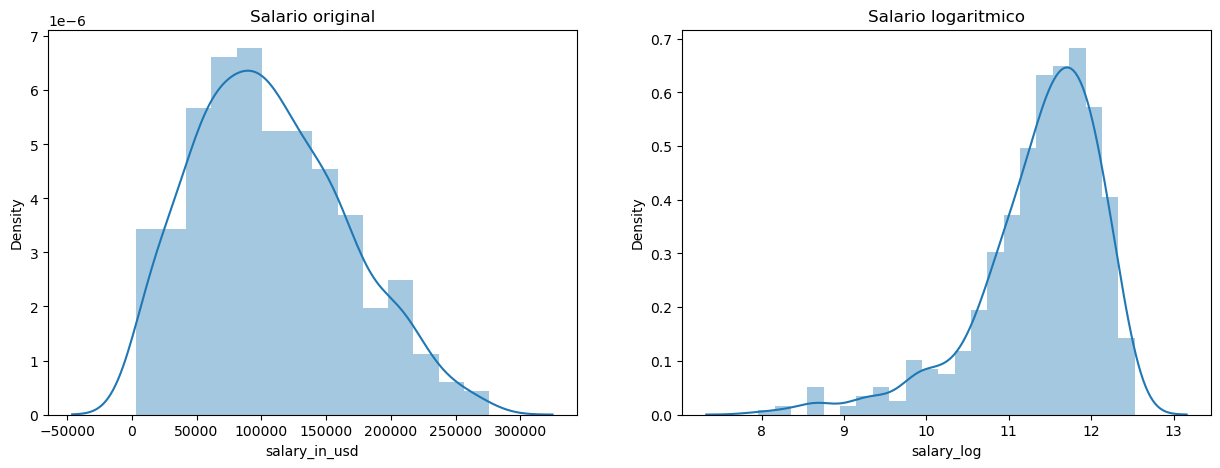

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salario original')
axes[1].set_title('Salario logaritmico')

sns.distplot(df['salary_in_usd'] ,ax = axes[0])
sns.distplot(df["salary_log"], ax = axes[1]);
plt.show()

Hacemos el shapiro test.

In [12]:
stats.shapiro(df["salary_log"])

ShapiroResult(statistic=0.8964730501174927, pvalue=1.2374640058369194e-19)

Como podemos observar tampoco funcionó, dando incluso peores resultaddos que el primer método.

### Raíz cuadrada

In [15]:
df["salary_raiz"] = df["salary_in_usd"].apply(lambda x: math.sqrt(x))
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_norm,salary_log,salary_raiz
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.10,11.29,282.55
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,0.56,12.47,509.90


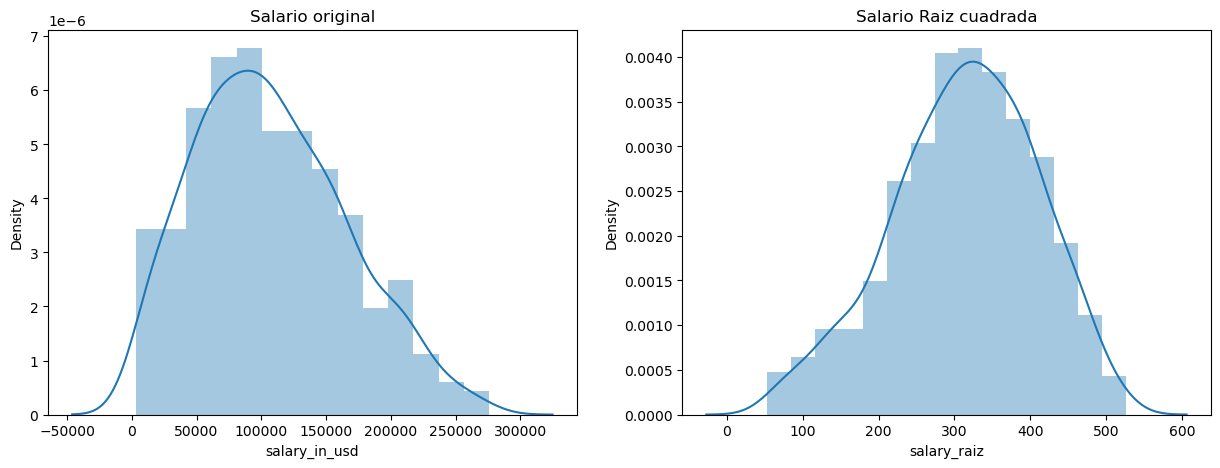

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salario original')
axes[1].set_title('Salario Raiz cuadrada')

sns.distplot(df['salary_in_usd'] ,ax = axes[0])
sns.distplot(df["salary_raiz"], ax = axes[1]);
plt.show()

In [17]:
stats.shapiro(df["salary_raiz"])

ShapiroResult(statistic=0.9891307353973389, pvalue=0.00020858156494796276)

AAYYÑÑ!! Casiii, pero no, como podemos ver estamos muy cerca de la normalización, seguiremos probando otros métodos.

### STATS.BOX.COX()

In [18]:
df["salary_box"], lambda_ajustada=stats.boxcox(df["salary_in_usd"])
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_norm,salary_log,salary_raiz,salary_box
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.10,11.29,282.55,1840.89
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,0.56,12.47,509.90,3849.50


El valos de lamda es:

In [19]:
lambda_ajustada

0.6243869109582177

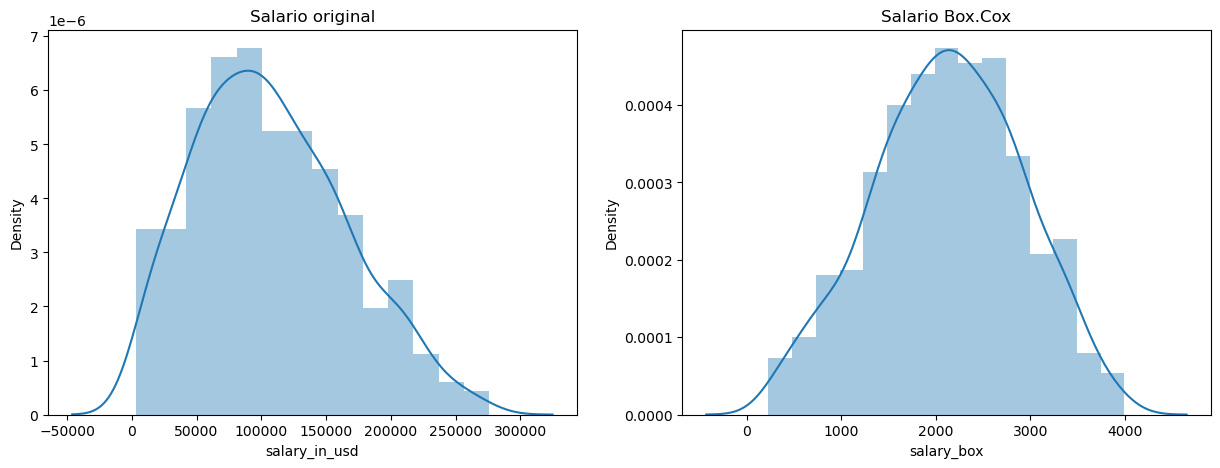

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salario original')
axes[1].set_title('Salario Box.Cox')

sns.distplot(df['salary_in_usd'] ,ax = axes[0])
sns.distplot(df["salary_box"], ax = axes[1]);
plt.show()

In [21]:
stats.shapiro(df["salary_box"])

ShapiroResult(statistic=0.9933606386184692, pvalue=0.00977953989058733)

Caasiii, estamos tan cercaaa y tan lejos 😫 la última es la vencida...

### Sklearn MinMaxScaller

In [23]:
MinMaxScaler(feature_range=(0,1), copy=True, clip=False)

MinMaxScaler()

In [26]:
minmax=MinMaxScaler()
minmax.fit(df[["salary_in_usd"]])

MinMaxScaler()

In [28]:
# Transformamos los datos
x_normalizado=minmax.transform(df[["salary_in_usd"]])
# Verificamos los minimos luego de la normalizacion
x_normalizado.min(axis=0)

array([0.])

In [29]:
# Verificamos loa máximos
x_normalizado.max(axis=0)

array([1.])

In [30]:
# Lo convertimos en DF
numericas_minmax=pd.DataFrame(x_normalizado, columns=["salary_sklearn"])
numericas_minmax.head(2)

,salary_sklearn
0,0.28
1,0.94


In [37]:
df["salary_sklearn"]=numericas_minmax
df.isnull().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd          0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
salary_norm            0
salary_log             0
salary_raiz            0
salary_box             0
salary_sklearn        10
dtype: int64

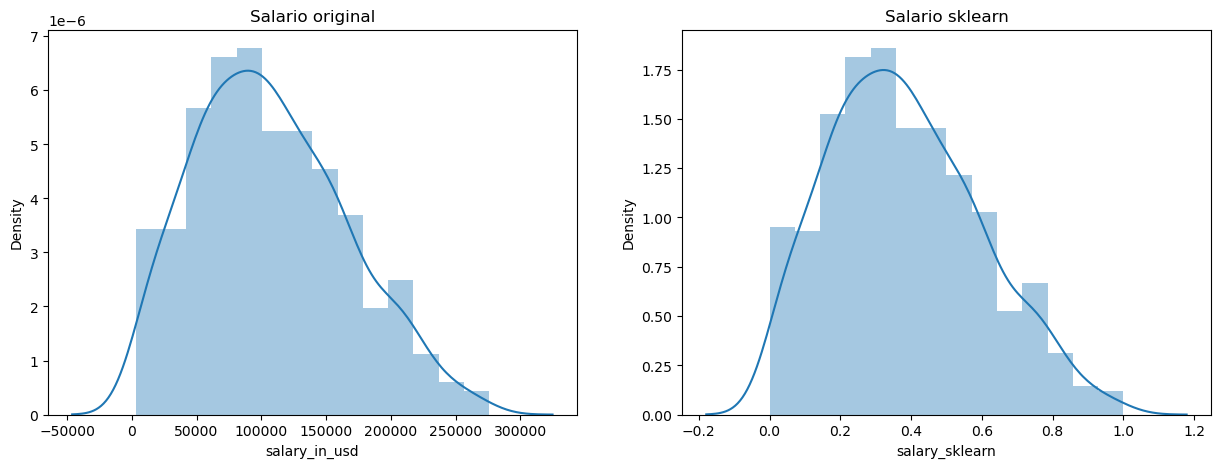

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salario original')
axes[1].set_title('Salario sklearn')

sns.distplot(df['salary_in_usd'] ,ax = axes[0])
sns.distplot(df["salary_sklearn"], ax = axes[1]);
plt.show()

In [33]:
stats.shapiro(df["salary_sklearn"])

ShapiroResult(statistic=nan, pvalue=1.0)

Revisar porque tenemos 10 nulos

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings